# Super Bowl Dataset Overview & EDA Notebook

## 1. Introduction

This notebook provides an **overview and exploratory data analysis (EDA)** of the historical Super Bowl dataset (1967–2020).  
The goal is to understand the structure of the dataset, describe its main variables, and identify patterns that may be useful for *unsupervised learning* techniques, specifically **clustering** and **association rules**, which will be applied in the following notebooks.

**Group Members:**
- Pedro Ribeiro — 27960  
- Ricardo Fernandes — 27961  
- Carolina Branco — 27983  
- João Barbosa — 27964  
- Diogo Abreu — 27975  

---

## 2. Business Goals

The main objectives of this analysis are:

1. Explore historical trends in Super Bowl games (scoring patterns, competitiveness, venue distribution, MVP statistics).  
2. Identify patterns and relationships between variables that can be analyzed through:
   - **Clustering**, to group games with similar characteristics.  
   - **Association rules**, to uncover frequent relationships between attributes (e.g., city–stadium, score patterns, team performance).  
3. Provide relevant insights for sports analysts, commentators, and enthusiasts, focusing on understanding underlying structures and patterns rather than performing predictive tasks.

---

## 3. Dataset Description

The dataset contains information about **all Super Bowl games from 1967 to 2020**.  
It includes ~54 rows (one per Super Bowl) and the following attributes:

### Dataset Metadata

| Attribute     | Type        | Description                              | Role        |
|---------------|-------------|------------------------------------------|-------------|
| Date          | Date        | Date of the Super Bowl                   | ignore / auxiliary |
| SB            | Categorical | Super Bowl identifier (e.g., LIV)        | id / auxiliary |
| Winner        | Categorical | Winning team                             | input       |
| Winner Pts    | Numeric     | Points scored by the winning team        | input       |
| Loser         | Categorical | Losing team                              | input       |
| Loser Pts     | Numeric     | Points scored by the losing team         | input       |
| MVP           | Categorical | Most Valuable Player                     | input       |
| Stadium       | Categorical | Stadium name                             | input       |
| City          | Categorical | City of the stadium                      | input       |
| State         | Categorical | State of the stadium                     | input       |


**Source:** [Kaggle – Super Bowl History Analysis](https://www.kaggle.com/code/ahmadjaved097/superbowl-history-analysis/notebook)

---

## 4. Exploratory Data Analysis (EDA)


In [27]:
# Linear algebra and data processing
import numpy as np
import pandas as pd

# Graphics / Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Utils
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [28]:
# Load dataset locally (ensure the CSV is in the same folder as the notebook)
df = pd.read_csv("superbowl.csv")   

### 4.1 Load and Check Data

In [29]:
# Load the Super Bowl dataset

superbowl_df = pd.read_csv('superbowl.csv')  

print("Number of rows in the dataset:", len(superbowl_df))

Number of rows in the dataset: 54


### 4.2 Variable Description

In [30]:
# Print top examples of the dataset
superbowl_df.head()

,Date,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State
0,Feb 2 2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
1,Feb 3 2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
2,Feb 4 2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
3,Feb 5 2017,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas
4,Feb 7 2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California


In [31]:
# Display basic information about the DataFrame
print(superbowl_df.info())

# Display descriptive statistics for numerical features
print(superbowl_df.describe())

# Display unique values for categorical features
for column in superbowl_df.columns:
    if superbowl_df[column].dtype == object:
        print(f"\nUnique values for {column}:")
        print(superbowl_df[column].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        54 non-null     object
 1   SB          54 non-null     object
 2   Winner      54 non-null     object
 3   Winner Pts  54 non-null     int64 
 4   Loser       54 non-null     object
 5   Loser Pts   54 non-null     int64 
 6   MVP         54 non-null     object
 7   Stadium     54 non-null     object
 8   City        54 non-null     object
 9   State       54 non-null     object
dtypes: int64(2), object(8)
memory usage: 4.3+ KB
None
       Winner Pts  Loser Pts
count   54.000000  54.000000
mean    30.111111  16.203704
std      9.766455   7.413348
min     13.000000   3.000000
25%     23.250000  10.000000
50%     30.500000  17.000000
75%     35.000000  21.000000
max     55.000000  33.000000

Unique values for Date:
['Feb 2 2020' 'Feb 3 2019' 'Feb 4 2018' 'Feb 5 2017' 'Feb 7 2016'
 'Feb 1 20

#### Missing Values Check

A quick inspection shows that all attributes contain 54 non-null entries, matching the total number of rows in the dataset.  
Therefore, the dataset has **no missing values**, and no imputation or cleaning is required.

### 4.3 Univariate Variable Analysis - Categorical Variables

In [32]:
# Get the categorical variables from the Super Bowl dataset
categorical_features = [feature for feature in superbowl_df.columns if superbowl_df[feature].dtype == object]
print("Categorical features:", categorical_features)

Categorical features: ['Date', 'SB', 'Winner', 'Loser', 'MVP', 'Stadium', 'City', 'State']


In [ ]:
def bar_plot(variable):
    """
        input: variable name, e.g., "Winner"
        output: bar plot & value counts
    """
    # get the feature
    var = superbowl_df[variable]
    # count number of categorical variable values
    varValue = var.value_counts()

    # visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values, rotation=45)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable, varValue))

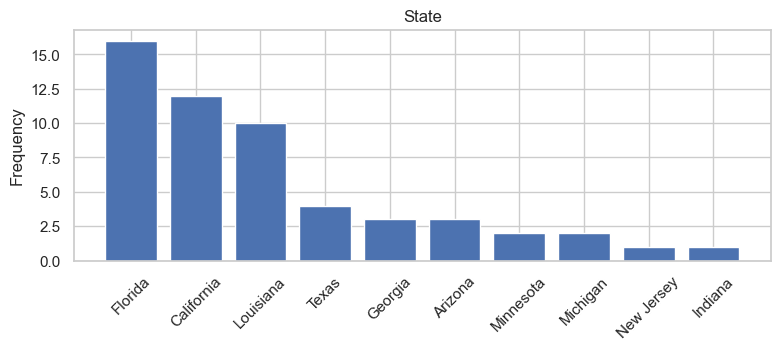

State:
State
Florida       16
California    12
Louisiana     10
Texas          4
Georgia        3
Arizona        3
Minnesota      2
Michigan       2
New Jersey     1
Indiana        1
Name: count, dtype: int64


In [34]:
# Plot categorical features with less than 20 distinct values
for cf in categorical_features:
    if superbowl_df[cf].nunique() < 20:
        bar_plot(cf)

In [35]:
# Print value counts for categorical features with 19 or more distinct values
for cf in categorical_features:
    if superbowl_df[cf].nunique() >= 19:
        print(f"\n{cf} value counts:\n")
        print(superbowl_df[cf].value_counts())



Date value counts:

Date
Feb 2 2020     1
Feb 3 2019     1
Feb 4 2018     1
Feb 5 2017     1
Feb 7 2016     1
Feb 1 2015     1
Feb 2 2014     1
Feb 3 2013     1
Feb 5 2012     1
Feb 6 2011     1
Feb 7 2010     1
Feb 1 2009     1
Feb 3 2008     1
Feb 4 2007     1
Feb 5 2006     1
Feb 6 2005     1
Feb 1 2004     1
Jan 26 2003    1
Feb 3 2002     1
Jan 28 2001    1
Jan 30 2000    1
Jan 31 1999    1
Jan 25 1998    1
Jan 26 1997    1
Jan 28 1996    1
Jan 29 1995    1
Jan 30 1994    1
Jan 31 1993    1
Jan 26 1992    1
Jan 27 1991    1
Jan 28 1990    1
Jan 22 1989    1
Jan 31 1988    1
Jan 25 1987    1
Jan 26 1986    1
Jan 20 1985    1
Jan 22 1984    1
Jan 30 1983    1
Jan 24 1982    1
Jan 25 1981    1
Jan 20 1980    1
Jan 21 1979    1
Jan 15 1978    1
Jan 9 1977     1
Jan 18 1976    1
Jan 12 1975    1
Jan 13 1974    1
Jan 14 1973    1
Jan 16 1972    1
Jan 17 1971    1
Jan 11 1970    1
Jan 12 1969    1
Jan 14 1968    1
Jan 15 1967    1
Name: count, dtype: int64

SB value counts:

SB
LIV (54)

### 4.4 Univariate Variable Analysis - Numerical variables

In [36]:
# Function to visualize frequency and distribution of numerical features
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(superbowl_df[variable], bins=50, color='skyblue', edgecolor='black')
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"{variable} distribution with histogram")
    plt.show()

In [37]:
# Get the numerical variables from superbowl_df
numerical_features = [feature for feature in superbowl_df.columns if superbowl_df[feature].dtype != object]
print("Numerical features:", numerical_features)

Numerical features: ['Winner Pts', 'Loser Pts']


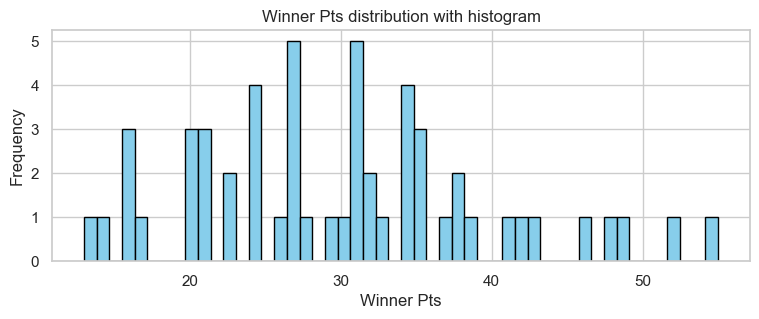

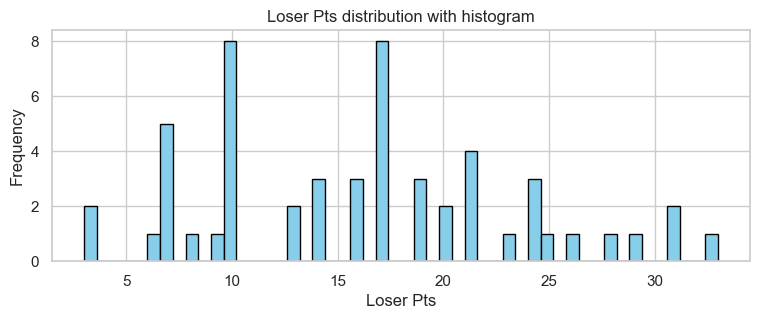

In [38]:
# Remove columns that are not useful for distribution plots (e.g., SB identifier)
removed_nf = ["SB"]  # adjust if there are others to remove
for nf in numerical_features:
    if nf not in removed_nf:
        plot_hist(nf)

### 4.5 Basic Data Analysis 

#### Bivariate analysis

- Winner - WinnerPts
- Winner - LoserPts
- State - Stadium
- City - Stadium


In [40]:
# Winner vs State
print("Winner vs State")
display(pd.crosstab(superbowl_df['Winner'], superbowl_df['State']))

# Winner vs Stadium
print("\nWinner vs Stadium")
display(pd.crosstab(superbowl_df['Winner'], superbowl_df['Stadium']))

# State vs Stadium
print("\nState vs Stadium")
display(pd.crosstab(superbowl_df['State'], superbowl_df['Stadium']))

# City vs Stadium
print("\nCity vs Stadium")
display(pd.crosstab(superbowl_df['City'], superbowl_df['Stadium']))

Winner vs State


State,Arizona,California,Florida,Georgia,Indiana,Louisiana,Michigan,Minnesota,New Jersey,Texas
Winner,,,,,,,,,,
Baltimore Colts,0,0,1,0,0,0,0,0,0,0
Baltimore Ravens,0,0,1,0,0,1,0,0,0,0
Chicago Bears,0,0,0,0,0,1,0,0,0,0
Dallas Cowboys,1,1,0,1,0,2,0,0,0,0
Denver Broncos,0,2,1,0,0,0,0,0,0,0
Green Bay Packers,0,1,1,0,0,1,0,0,0,1
Indianapolis Colts,0,0,1,0,0,0,0,0,0,0
Kansas City Chiefs,0,0,1,0,0,1,0,0,0,0
Los Angeles Raiders,0,0,1,0,0,0,0,0,0,0



Winner vs Stadium


Stadium,Alltel Stadium,Cowboys Stadium,Dolphin Stadium,Ford Field,Georgia Dome,Hard Rock Stadium,Jack Murphy Stadium,Joe Robbie Stadium,Levi's Stadium,Louisiana Superdome,...,Rice Stadium,Rose Bowl,Stanford Stadium,Sun Devil Stadium,Sun Life Stadium,Superdome,Tampa Stadium,Tulane Stadium,U.S. Bank Stadium,University of Phoenix Stadium
Winner,,,,,,,,,,,,,,,,,,,,,
Baltimore Colts,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Baltimore Ravens,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chicago Bears,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Dallas Cowboys,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
Denver Broncos,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Green Bay Packers,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Indianapolis Colts,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kansas City Chiefs,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Los Angeles Raiders,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0



State vs Stadium


Stadium,Alltel Stadium,Cowboys Stadium,Dolphin Stadium,Ford Field,Georgia Dome,Hard Rock Stadium,Jack Murphy Stadium,Joe Robbie Stadium,Levi's Stadium,Louisiana Superdome,...,Rice Stadium,Rose Bowl,Stanford Stadium,Sun Devil Stadium,Sun Life Stadium,Superdome,Tampa Stadium,Tulane Stadium,U.S. Bank Stadium,University of Phoenix Stadium
State,,,,,,,,,,,,,,,,,,,,,
Arizona,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
California,0,0,0,0,0,0,1,0,1,0,...,0,5,1,0,0,0,0,0,0,0
Florida,1,0,1,0,0,1,0,2,0,0,...,0,0,0,0,1,0,2,0,0,0
Georgia,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Indiana,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Louisiana,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,1,0,3,0,0
Michigan,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Minnesota,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
New Jersey,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



City vs Stadium


Stadium,Alltel Stadium,Cowboys Stadium,Dolphin Stadium,Ford Field,Georgia Dome,Hard Rock Stadium,Jack Murphy Stadium,Joe Robbie Stadium,Levi's Stadium,Louisiana Superdome,...,Rice Stadium,Rose Bowl,Stanford Stadium,Sun Devil Stadium,Sun Life Stadium,Superdome,Tampa Stadium,Tulane Stadium,U.S. Bank Stadium,University of Phoenix Stadium
City,,,,,,,,,,,,,,,,,,,,,
Arlington,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Atlanta,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Detroit,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
East Rutherford,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Glendale,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Houston,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Indianapolis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jacksonville,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Los Angeles,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4.6 Visualization

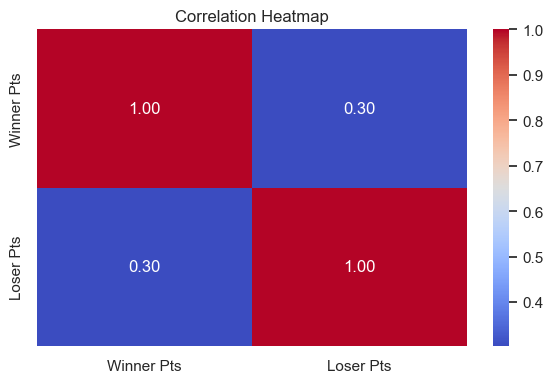

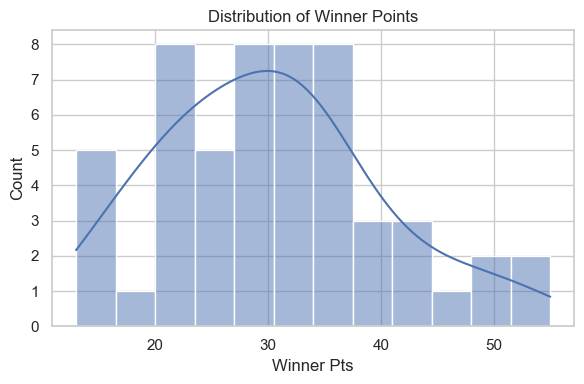

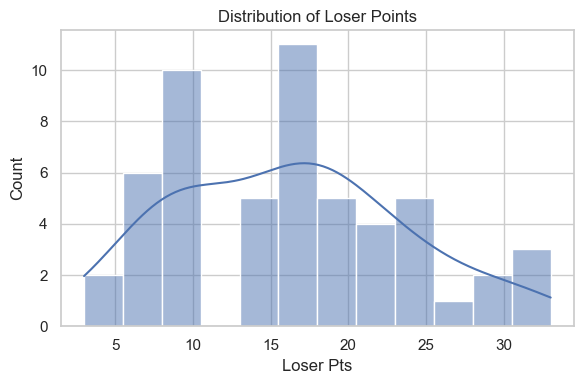

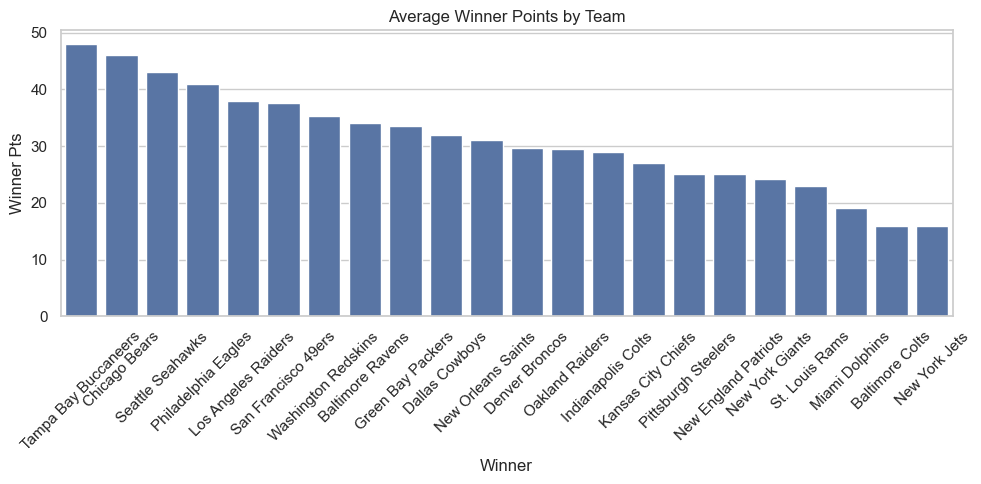

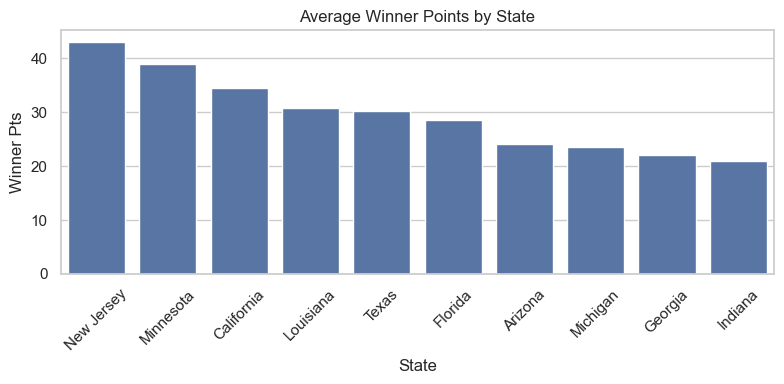

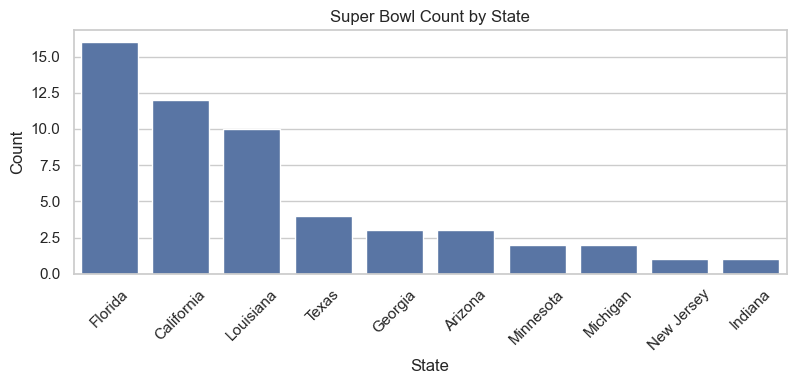

In [44]:
sns.set(style="whitegrid")

# ============================
# 1. Correlation Heatmap
# ============================
numerical_features = ["Winner Pts", "Loser Pts"]

plt.figure(figsize=(6,4))
sns.heatmap(
    superbowl_df[numerical_features].corr(),
    annot=True, fmt=".2f", cmap="coolwarm"
)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


# ============================
# 2. Distribution of Winner Points
# ============================
plt.figure(figsize=(6,4))
sns.histplot(superbowl_df["Winner Pts"], bins=12, kde=True)
plt.title("Distribution of Winner Points")
plt.tight_layout()
plt.show()


# ============================
# 3. Distribution of Loser Points
# ============================
plt.figure(figsize=(6,4))
sns.histplot(superbowl_df["Loser Pts"], bins=12, kde=True)
plt.title("Distribution of Loser Points")
plt.tight_layout()
plt.show()

# ============================
# 4. Winner Points by Winner
# ============================
winner_pts = superbowl_df.groupby('Winner')['Winner Pts'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=winner_pts, x='Winner', y='Winner Pts')
plt.xticks(rotation=45)
plt.title("Average Winner Points by Team")
plt.tight_layout()
plt.show()

# ============================
# 5. Winner Points by Winner
# ============================
state_pts = superbowl_df.groupby('State')['Winner Pts'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8,4))
sns.barplot(data=state_pts, x='State', y='Winner Pts')
plt.xticks(rotation=45)
plt.title("Average Winner Points by State")
plt.tight_layout()
plt.show()

# ============================
# 6. State Frequency Plot (clean & readable)
# ============================
state_counts = superbowl_df["State"].value_counts().reset_index()
state_counts.columns = ["State", "Count"]

plt.figure(figsize=(8,4))
sns.barplot(data=state_counts, x="State", y="Count")
plt.xticks(rotation=45)
plt.title("Super Bowl Count by State")
plt.tight_layout()
plt.show()

### 4.7 Feature Engineering

For the MVP column, we performed a simplified grouping to make it suitable for analysis and later machine learning:

1. Extracted a simplified **MVP_Group** (e.g., first name or "Unknown").  
2. Visualized the distribution and grouped rare MVPs (appearing less than twice) into "Other".  
3. Removed the original MVP column and kept only the simplified **MVP_Group**.  
4. Applied **one-hot encoding** to convert MVP_Group into binary features.

This approach reduces noise, prevents overfitting, and will be applied similarly to other categorical attributes in subsequent steps.

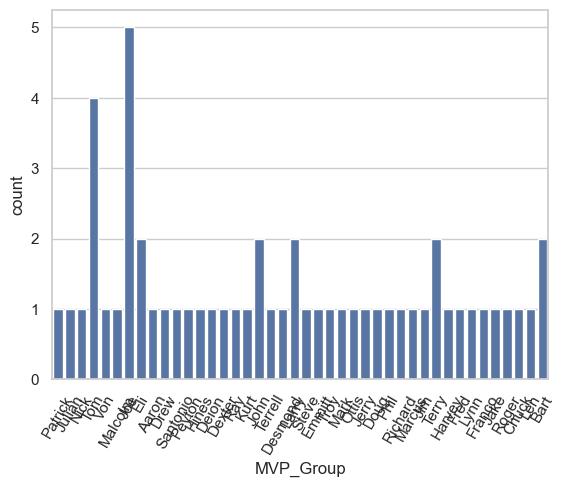

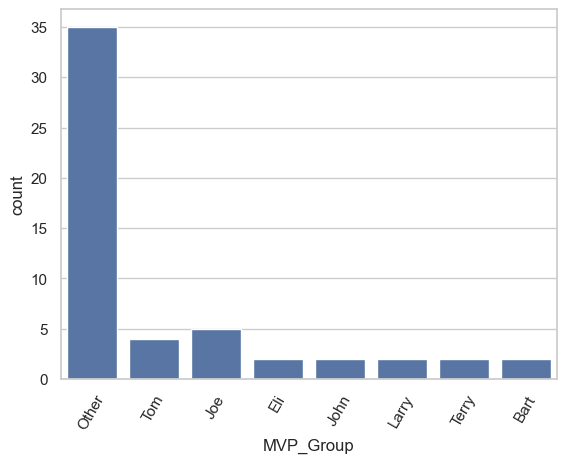

,Date,SB,Winner,Winner Pts,Loser,Loser Pts,Stadium,City,State,MVP_Group_Bart,MVP_Group_Eli,MVP_Group_Joe,MVP_Group_John,MVP_Group_Larry,MVP_Group_Other,MVP_Group_Terry,MVP_Group_Tom
0,Feb 2 2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Hard Rock Stadium,Miami Gardens,Florida,False,False,False,False,False,True,False,False
1,Feb 3 2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Mercedes-Benz Stadium,Atlanta,Georgia,False,False,False,False,False,True,False,False
2,Feb 4 2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,U.S. Bank Stadium,Minneapolis,Minnesota,False,False,False,False,False,True,False,False
3,Feb 5 2017,LI (51),New England Patriots,34,Atlanta Falcons,28,NRG Stadium,Houston,Texas,False,False,False,False,False,False,False,True
4,Feb 7 2016,50,Denver Broncos,24,Carolina Panthers,10,Levi's Stadium,Santa Clara,California,False,False,False,False,False,True,False,False


In [ ]:
# Inspect first MVPs
superbowl_df["MVP"].head(10)

# Extract a simplified "MVP Group" (for example: only first name or group unknown)
superbowl_df["MVP_Group"] = [i.split(" ")[0] if i != "Unknown" else "Unknown" for i in superbowl_df["MVP"]]
superbowl_df["MVP_Group"].head(10)

# Count plot of MVP_Group
sns.countplot(x="MVP_Group", data=superbowl_df)
plt.xticks(rotation=60)
plt.show()

# Group rare MVPs into "Other" category (those appearing less than 2 times)
value_counts = superbowl_df["MVP_Group"].value_counts()
rare_mvps = value_counts[value_counts < 2].index
superbowl_df["MVP_Group"] = superbowl_df["MVP_Group"].replace(rare_mvps, "Other")

# Count plot after grouping
sns.countplot(x="MVP_Group", data=superbowl_df)
plt.xticks(rotation=60)
plt.show()

# Remove original MVP column, just keep the simplified category
superbowl_df.drop(labels=["MVP"], axis=1, inplace=True)

# One-hot encoding MVP_Group
superbowl_df = pd.get_dummies(superbowl_df, columns=["MVP_Group"])
superbowl_df.head()


### 4.8 Outlier Detection

In [48]:
# Function to detect outliers based on IQR method
def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c], 25)
        # 3rd quartile
        Q3 = np.percentile(df[c], 75)
        # Interquartile range
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # Detect outlier indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # Store indices
        outlier_indices.extend(outlier_list_col)

    # Count occurrences and consider rows that are outliers in more than one feature
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)

    return multiple_outliers

# Columns to check for outliers (adjusted)
numerical_features = ["Winner Pts", "Loser Pts"]

# Find outliers
outliers = superbowl_df.loc[detect_outliers(superbowl_df, numerical_features)]
display(outliers)

# Drop outliers
superbowl_df = superbowl_df.drop(detect_outliers(superbowl_df, numerical_features), axis=0).reset_index(drop=True)

,Date,SB,Winner,Winner Pts,Loser,Loser Pts,Stadium,City,State,MVP_Group_Bart,MVP_Group_Eli,MVP_Group_Joe,MVP_Group_John,MVP_Group_Larry,MVP_Group_Other,MVP_Group_Terry,MVP_Group_Tom
